<a href="https://colab.research.google.com/github/kathuman/Python-Experiments/blob/main/Python-Machine_Learning/200311_ML_in_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Book_ Machine learning in Production by Andrew Kelleher, ISBN: 978-0-13-411654-9

# p.42
import pandas as pd
import numpy as np

# Generate the data
X = pd.DataFrame(np.random.normal(size=(100,100)), columns=['X_{}'.format(i+1) for i in range(100)])
X['Y'] = X['X_1'] + np.random.normal(size=100)

In [2]:
print(X.head())

        X_1       X_2       X_3  ...      X_99     X_100         Y
0 -0.683392  1.335988  1.633065  ...  0.742248 -1.936314 -1.202571
1 -3.064752 -2.256201 -0.924819  ...  1.532677  0.523863 -3.256092
2  0.969854  0.943362 -1.139027  ... -0.118779 -0.634141  1.695841
3  0.767149 -0.354294 -0.983158  ... -0.596434  0.628271 -0.381649
4  0.205058 -0.554463  0.185099  ...  0.034053  0.416654  0.522966

[5 rows x 101 columns]


In [3]:
from scipy.stats import pearsonr
alpha = 0.05
n = len(X.columns) - 1
bonferroni_alpha = alpha/n
for xi in X.columns:
    r, p_value = pearsonr(X[xi], X['Y'])
    if p_value < bonferroni_alpha:
        print(xi, r, p_value, '***')
    elif p_value < alpha:
        print(xi, r, p_value)

X_1 0.7002230036006358 5.169909048586191e-16 ***
X_43 0.22684251976571568 0.02323320968889286
X_65 -0.25114176159076457 0.011722977745107109
X_71 -0.21901054050676275 0.02858073823669829
Y 1.0 0.0 ***


In [4]:
# p.145 Bayesian Networks

import pandas as pd
import numpy as np
import pymc3 as pymc

%matplotlib inline

In [5]:
# generte some data
N = 10000
beta0 = -1
beta1 = 1.
beta2 = 2.

x1 = np.random.normal(size=N)
x2 = np.random.normal(size=N)
y = np.random.normal(beta1*x1 + beta2*x2 + beta0)

In [6]:
with pymc.Model() as model:
    b0 = pymc.Normal('beta_0', mu=0, sd=100.)
    b1 = pymc.Normal('beta_1', mu=0, sd=100.)
    b2 = pymc.Normal('beta_2', mu=0, sd=100.)
    error = pymc.Normal('epsilon', mu=0, sd=100.)
    
    y_out = b0 + b1*x1 + b2*x2
    y_var = pymc.Normal('y', mu=y_out, sd=error, observed=y)

In [9]:
with model:
    trace = pymc.sample(3000)

SamplingError: ignored

In [8]:
pymc.traceplot(trace)

NameError: ignored

In [ ]:
# p.168 - Experiments in causal inference
import numpy as np
import pandas as pd

N = 1000

x = np.random.normal(size=N)
d = np.random.binomial(1.,0.5,size=N)
y = 3.*d + x + np.random.normal()

X = pd.DataFrame({'X':x, 'D':d, 'Y':y})

In [ ]:
from statsmodels.api import OLS
X['intercept'] = 1
model = OLS(X['Y'], X[['D','intercept']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     2229.
Date:                Sun, 22 Mar 2020   Prob (F-statistic):          1.36e-256
Time:                        11:05:07   Log-Likelihood:                -1397.9
No. Observations:                1000   AIC:                             2800.
Df Residuals:                     998   BIC:                             2810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
D              2.9271      0.062     47.216      0.000       2.805       3.049
intercept      0.1689      0.044      3.829      0.000       0.082       0.255
==============================================================================
Omnibus:                        0.579   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.652
Skew:                          -0.051   Prob(JB):                        0.722
Kurtosis:                       2.927   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# p.152 Principal component analysis

import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

X = pd.DataFrame(np.random.multivariate_normal
                    ([2,2], [[1,.5],[.5,1]], size=5000),
                    columns = ['$x_1$', '$x_2$'])

In [ ]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model = model.fit(X)

ValueError: Argument U has a size 2 which does not match 1, the number of arrow positions

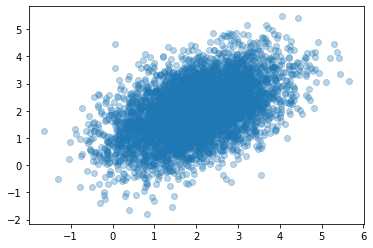

In [ ]:
plt.scatter(X['$x_1$'],X['$x_2$'], alpha=0.3)

OX=[2]
OY=[2]
U=model.components_[:,0]
V=model.components_[:,1]

plt.quiver(OX,OY,U,V)

plt.show()

In [ ]:
model.components_

array([[ 0.6984338 ,  0.71567466],
       [-0.71567466,  0.6984338 ]])

In [ ]:
model.components_[:,0]

array([ 0.6984338 , -0.71567466])

ValueError: Argument U has a size 2 which does not match 1, the number of arrow positions

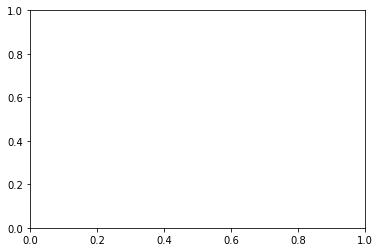

In [ ]:
X=[0]
Y=[0]
U=[[1],[0]]
V=[[1],[1]]

plt.quiver(X,Y,U,V)
plt.show()